In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

In [2]:
joined_zips_grb_df = pd.read_csv("zips_load_demographics.csv")

In [3]:
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0
1,78652,908280.0,NaN,NaN,NaN,NaN,NaN
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0


In [4]:
joined_zips_grb_df = joined_zips_grb_df.dropna()
joined_zips_grb_df.head()


,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0


In [5]:
joined_zips_grb_df["POPULATION_PER_UNIT"] = joined_zips_grb_df.TOTAL_POPULATION/joined_zips_grb_df.TOTAL_HOUSING_UNITS
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,POPULATION_PER_UNIT
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0,3.851463
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0,3.021622
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0,1.197536
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0,2.325033
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0,1.881778


In [6]:
joined_zips_grb_df["LOAD_PER_CAPITA"] = joined_zips_grb_df.load_weight/joined_zips_grb_df.TOTAL_POPULATION
joined_zips_grb_df.head()

,ZIP,load_weight,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,POPULATION_PER_UNIT,LOAD_PER_CAPITA
0,78617,1325600.0,27900.0,6520.0,52819.0,69936.0,7244.0,3.851463,47.512545
2,78653,825420.0,20822.0,6332.0,66752.0,75678.0,6891.0,3.021622,39.641725
3,78701,458460.0,7875.0,4855.0,112201.0,173289.0,6576.0,1.197536,58.217143
4,78702,3741320.0,22876.0,8937.0,54053.0,73919.0,9839.0,2.325033,163.547823
5,78703,3671428.0,20788.0,9723.0,98553.0,166396.0,11047.0,1.881778,176.612854


In [23]:
features = ['TOTAL_POPULATION', 'TOTAL_HOUSEHOLDS', 'MEDIAN_HOUSEHOLD_INCOME', 'TOTAL_HOUSING_UNITS', 'POPULATION_PER_UNIT', 'LOAD_PER_CAPITA']
# Separating out the features
x = joined_zips_grb_df.loc[:, features].values
# Separating out the target
y = joined_zips_grb_df.loc[:,['load_weight']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [36]:
# Apply principal component analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_df = pd.DataFrame(data = principalComponents, columns = ['PRINCIPAL_COMPONENT_1', 'PRINCIPAL_COMPONENT_2'])

In [37]:
PCA_df

,PRINCIPAL_COMPONENT_1,PRINCIPAL_COMPONENT_2
0,-0.623444,2.775769
1,-0.950439,1.401673
2,-1.793886,-2.065083
3,-0.346635,0.201691
4,-0.579728,-1.488358
5,3.275519,-1.083476
6,0.384423,2.708113
7,-1.497646,1.330415
8,-2.172150,-0.351539
9,0.715907,0.223049


In [38]:
final_df = pd.concat([PCA_df, joined_zips_grb_df[['load_weight']]], axis = 1)

In [39]:
final_df

,PRINCIPAL_COMPONENT_1,PRINCIPAL_COMPONENT_2,load_weight
0,-0.623444,2.775769,1325600.0
1,-0.950439,1.401673,NaN
2,-1.793886,-2.065083,825420.0
3,-0.346635,0.201691,458460.0
4,-0.579728,-1.488358,3741320.0
5,3.275519,-1.083476,3671428.0
6,0.384423,2.708113,5156220.0
7,-1.497646,1.330415,1606560.0
8,-2.172150,-0.351539,NaN
9,0.715907,0.223049,NaN


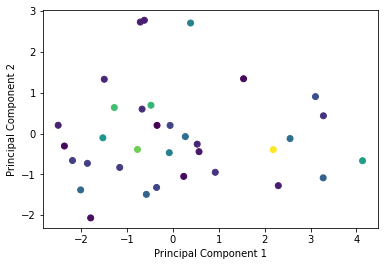

In [48]:
# Plot two-dimensional data from PCA analysis
plt.scatter(final_df.PRINCIPAL_COMPONENT_1, final_df.PRINCIPAL_COMPONENT_2, c=final_df.load_weight)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [49]:
# # Define the features set.
# X = joined_zips_grb_df[['MEDIAN_HOUSEHOLD_INCOME', 'TOTAL_POPULATION', 'TOTAL_HOUSEHOLDS']]
# y = joined_zips_grb_df['load_weight']

# # Splitting into Train and Test sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Creating a StandardScaler instance.
# scaler = StandardScaler()
# # Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)

# # Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

# regr = LinearRegression()
# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)
# print(y_pred.shape)

# # Calculating the accuracy score.
# #acc_score = accuracy_score(y_test, prediction)

# print(regr.coef_)